# **Tugas 2 - Pre-Processing Data dan TF-IDF**

**Nama : Adz Dzikry Pradana Putra**

**NIM  : 210411100093**

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Inisialisasi data yang sudah dicrawl untuk diapanggil dan disimpan ke variable df



In [45]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/data_berita_detik.csv")
df.head(6)

,judul,isi,tanggal,kategori
0,Game Battle of Guardian Gelar Eksibisi di PON ...,Jakarta - Pada ajang Pekan Olahraga Nasional (...,"Minggu, 08 Sep 2024 19:03 WIB",Games
1,"Setelah Viral, Game Hamster Kombat akan Jadi T...","Jakarta - Bitget, exchange mata uang kripto, m...","Minggu, 08 Sep 2024 15:03 WIB",Games
2,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games
3,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games
4,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games
5,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games


**CLEANING**


---



**Cleaning Data** adalah tahap pembersihan data ulasan dari elemen yang tidak diinginkan , seperti :
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [46]:
import re
import string
import nltk

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', text)

def remove_html(text):
  html = re.compile(r'<.#?>')
  return html.sub(r'', text)

def remove_emoji(text):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def remove_symbols(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #menghapus semua simbol
  return text

df['Hasil cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_html(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_emoji(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_symbols(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing
0,Game Battle of Guardian Gelar Eksibisi di PON ...,Jakarta - Pada ajang Pekan Olahraga Nasional (...,"Minggu, 08 Sep 2024 19:03 WIB",Games,Jakarta Pada ajang Pekan Olahraga Nasional PO...
1,"Setelah Viral, Game Hamster Kombat akan Jadi T...","Jakarta - Bitget, exchange mata uang kripto, m...","Minggu, 08 Sep 2024 15:03 WIB",Games,Jakarta Bitget exchange mata uang kripto meng...
2,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...
3,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...
4,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...
5,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...


**CASE FOLDING**


---



**Casefolding** adalah Proses merubah semua huruf yang ada pada data ulasan agar dirubah menjadi huruf kecil , hal ini dilakukan untuk memastikan konsistensi dalam datanya

In [47]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['Hasil case_folding'] = df['Hasil cleansing'].apply(case_folding)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding
0,Game Battle of Guardian Gelar Eksibisi di PON ...,Jakarta - Pada ajang Pekan Olahraga Nasional (...,"Minggu, 08 Sep 2024 19:03 WIB",Games,Jakarta Pada ajang Pekan Olahraga Nasional PO...,jakarta pada ajang pekan olahraga nasional po...
1,"Setelah Viral, Game Hamster Kombat akan Jadi T...","Jakarta - Bitget, exchange mata uang kripto, m...","Minggu, 08 Sep 2024 15:03 WIB",Games,Jakarta Bitget exchange mata uang kripto meng...,jakarta bitget exchange mata uang kripto meng...
2,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...
3,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...
4,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...
5,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi**

Proses ini berfokus pada pembagian kalimat menjadi kata-kata individual. Setiap kata akan diproses secara terpisah dan disimpan dalam suatu variabel atau array.

In [48]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['Hasil case_folding'].apply(tokenize)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize
0,Game Battle of Guardian Gelar Eksibisi di PON ...,Jakarta - Pada ajang Pekan Olahraga Nasional (...,"Minggu, 08 Sep 2024 19:03 WIB",Games,Jakarta Pada ajang Pekan Olahraga Nasional PO...,jakarta pada ajang pekan olahraga nasional po...,"[jakarta, pada, ajang, pekan, olahraga, nasion..."
1,"Setelah Viral, Game Hamster Kombat akan Jadi T...","Jakarta - Bitget, exchange mata uang kripto, m...","Minggu, 08 Sep 2024 15:03 WIB",Games,Jakarta Bitget exchange mata uang kripto meng...,jakarta bitget exchange mata uang kripto meng...,"[jakarta, bitget, exchange, mata, uang, kripto..."
2,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...,"[jakarta, mobile, legends, ml, adalah, salah, ..."
3,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...,"[jakarta, free, fire, world, series, ffws, sou..."
4,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...,"[jakarta, k, selaku, penerbit, dan, visual, co..."
5,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...,"[jakarta, warner, bros, pictures, telah, meril..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yakni pemilihan kata-kata yang memiliki makna atau relevansi untuk analisis, sementara kata-kata yang tidak berkontribusi atau merupakan kata penghubung umum (stopwords) dihilangkan. Contoh kata-kata penghubung adalah "dan," "atau," "lalu," dan sejenisnya.

In [49]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [50]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Hasil stopword'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,Game Battle of Guardian Gelar Eksibisi di PON ...,Jakarta - Pada ajang Pekan Olahraga Nasional (...,"Minggu, 08 Sep 2024 19:03 WIB",Games,Jakarta Pada ajang Pekan Olahraga Nasional PO...,jakarta pada ajang pekan olahraga nasional po...,"[jakarta, pada, ajang, pekan, olahraga, nasion...",jakarta ajang pekan olahraga nasional pon aceh...
1,"Setelah Viral, Game Hamster Kombat akan Jadi T...","Jakarta - Bitget, exchange mata uang kripto, m...","Minggu, 08 Sep 2024 15:03 WIB",Games,Jakarta Bitget exchange mata uang kripto meng...,jakarta bitget exchange mata uang kripto meng...,"[jakarta, bitget, exchange, mata, uang, kripto...",jakarta bitget exchange mata uang kripto mengu...
2,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...,"[jakarta, mobile, legends, ml, adalah, salah, ...",jakarta mobile legends ml salah game online po...
3,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...,"[jakarta, free, fire, world, series, ffws, sou...",jakarta free fire world series ffws southeeast...
4,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...,"[jakarta, k, selaku, penerbit, dan, visual, co...",jakarta k penerbit visual concept pengembang g...
5,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...,"[jakarta, warner, bros, pictures, telah, meril...",jakarta warner bros pictures merilis teaser tr...


In [51]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** mengonversi setiap dokumen teks menjadi vektor yang berisi
frekuensi kemunculan setiap kata dalam dokumen tersebut.Pembobotan TF-IDF
menghitung nilai bobot setiap kata untuk setiap dokumen. Ini dibagi menjadi dua proses
yaitu **TF** dan **IDF**.

**TF (Term Frequency)** yang mengukur seberapa sering kata muncul dalam suatu dokumen dengan membandingkannya dengan keseluruhan dalam berkas.

**IDF (Inverse Document Frequency)** untuk menilai kepentingan kata tersebut dalam konteks seluruh dokumen yang ada.

In [52]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv", sep=",")

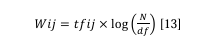

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Hasil stopword'])

# Mengubah kedalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aaa,aab,aao,aarav,abdullah,abg,ability,abnormal,abramovich,absen,...,zirkzee,zola,zombie,zombies,zona,zone,zones,zora,zs,zwolle
0,0.0,0.0,0.0,0.0,0.048598,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.059512,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
tfidf_df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_tfidf.csv",encoding='utf8', index=False)

In [55]:
# Menampilkan jumlah kolom
jumlah_kolom = tfidf_df.shape[1]

print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah kolom: 5288


In [56]:
import pickle

# Simpan model TfidfVectorizer
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Simpan data hasil TF-IDF
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_matrix.pkl', 'wb') as file:
    pickle.dump(tfidf_matrix, file)

# Simpan DataFrame hasil TF-IDF
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_df.pkl', 'wb') as file:
    pickle.dump(tfidf_df, file)

In [57]:
# Muat model TfidfVectorizer
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_matrix.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Muat data hasil TF-IDF
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_matrix.pkl', 'rb') as file:
    loaded_tfidf_matrix = pickle.load(file)

# Muat DataFrame hasil TF-IDF
with open('/content/drive/My Drive/PPW-A/report/Tugas-PPW/tfidf_df.pkl', 'rb') as file:
    loaded_tfidf_df = pickle.load(file)

# Menampilkan DataFrame yang dimuat ulang
loaded_tfidf_df.head(10)

,aaa,aab,aao,aarav,abdullah,abg,ability,abnormal,abramovich,absen,...,zirkzee,zola,zombie,zombies,zona,zone,zones,zora,zs,zwolle
0,0.0,0.0,0.0,0.0,0.048598,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.059512,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
